In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('subscription_prediction.xls')
pd.set_option('display.max_columns', None)

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,195,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df['job'].unique()

array(['admin.', 'services', 'blue-collar', 'housemaid', 'management',
       'technician', 'entrepreneur', 'retired', 'student',
       'self-employed', 'unknown', 'unemployed'], dtype=object)

In [6]:
data = df.drop(['cons.conf.idx','cons.price.idx', 'emp.var.rate','euribor3m','nr.employed'], axis=1)   

In [7]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,195,1,999,0,nonexistent,no


In [8]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [9]:
df.select_dtypes("int")

,age,duration,campaign,pdays,previous
0,40,151,1,999,0
1,56,307,1,999,0
2,41,217,1,999,0
3,57,293,1,999,0
4,39,195,1,999,0
...,...,...,...,...,...
10117,64,151,3,999,0
10118,37,281,1,999,0
10119,73,334,1,999,0
10120,44,442,1,999,0


In [10]:
df["y"] = df["y"].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
df["y"].unique()

array([0, 1], dtype=int64)

In [12]:
train_data = df.sample(frac=.85, random_state = 417)

In [13]:
train_data.shape

(8604, 21)

In [14]:
df["y"].value_counts()

y
0    5482
1    4640
Name: count, dtype: int64

In [15]:
train_data["y"].value_counts(normalize=True)

y
0    0.540098
1    0.459902
Name: proportion, dtype: float64

In [16]:
test_data = df.drop(train_data.index)

In [17]:
test_data.shape

(1518, 21)

In [18]:
X_train = train_data.drop("y", axis=1)
y_train = train_data["y"]
X_test = test_data.drop("y", axis=1)
y_test = test_data["y"]

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8604, 20), (8604,), (1518, 20), (1518,))

In [20]:
def knn(features,single_row,k):
    diff = X_train[features] - single_row[features]
    smallest_k = diff.nsmallest(k)
    prediction = y_train[smallest_k.index].mode()[0]
    return prediction

In [21]:
knn("age",X_train.iloc[101],5)

1

In [22]:
y_predict = X_test.apply(lambda x: knn("age", x, 4),axis=1)

In [23]:
(y_test == y_predict).sum()/len(y_test)*100

44.99341238471673

In [24]:
# Feature engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models.
# Common feature engineering steps include:
# - Handling missing values
# - Encoding categorical variables (e.g., one-hot encoding)
# - Normalizing or scaling numerical features

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
df1 = pd.get_dummies(df,columns = ["marital"], drop_first=True)

In [74]:
train_data_c = df1.sample(frac=.85, random_state = 417)
test_data_c = df1.drop(train_data_c.index)

In [75]:
X_train_c = train_data_c.drop("y", axis=1)
y_train_c = train_data_c["y"]
X_test_c = test_data_c.drop("y", axis=1)
y_test_c = test_data_c["y"]

In [76]:
min_1 = df1["nr.employed"].min()
max_1 = df1["nr.employed"].max()
X_train_c["nr.employed"] = (X_train_c["nr.employed"] - min_1)/(max_1-min_1)
X_test_c["nr.employed"] = (X_test_c["nr.employed"] - min_1)/(max_1-min_1)
min_age = df1["age"].min()
max_age = df1["age"].max()
X_train_c["age"] = (X_train_c["age"] - min_age)/(max_age - min_age)
X_test_c["age"] = (X_test_c["age"] - min_age)/(max_age - min_age)


In [77]:
def knn2(features,single_input,k):
    squared_distance = 0
    for feature in features:
        squared_distance += (X_train_c[feature].astype("float") - float(single_input[feature]))**2
    X_train_c["distance"] = squared_distance**0.5
    prediction =y_train_c[ X_train_c["distance"].nsmallest(k).index].mode()[0]
    return prediction    

In [78]:
X_test_c.shape

(1518, 22)

In [79]:
knn2(["age","nr.employed","duration", "campaign"], X_test_c.iloc[0], 4)

0

In [80]:
y_predict_c = X_test_c.apply(lambda x: knn2(["age","nr.employed", "duration", "campaign"], x, 4), axis=1)

In [81]:
(y_test_c == y_predict_c).sum()/len(y_test_c)*100

73.91304347826086

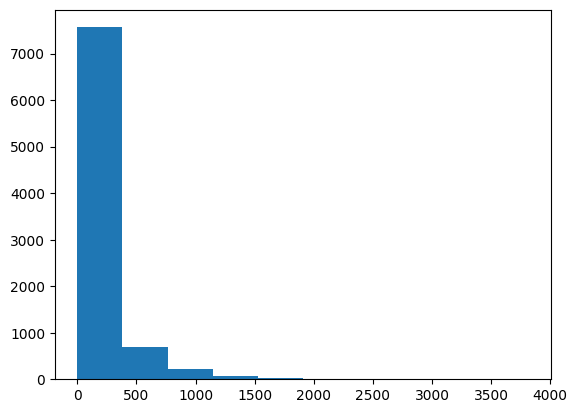

In [83]:
plt.hist(X_train_c["distance"])
plt.show()